In [17]:
import pandas as pd
import numpy as np

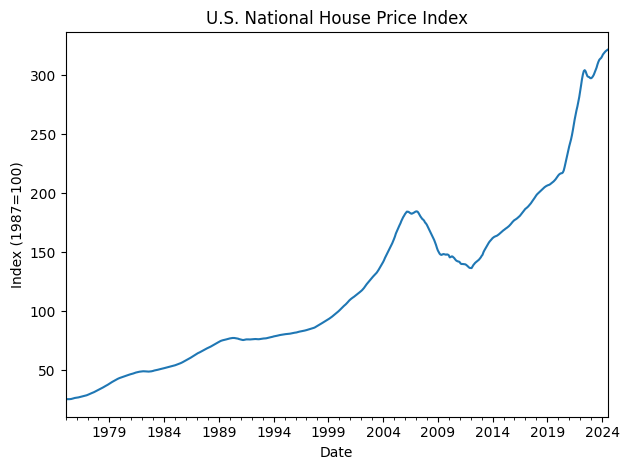

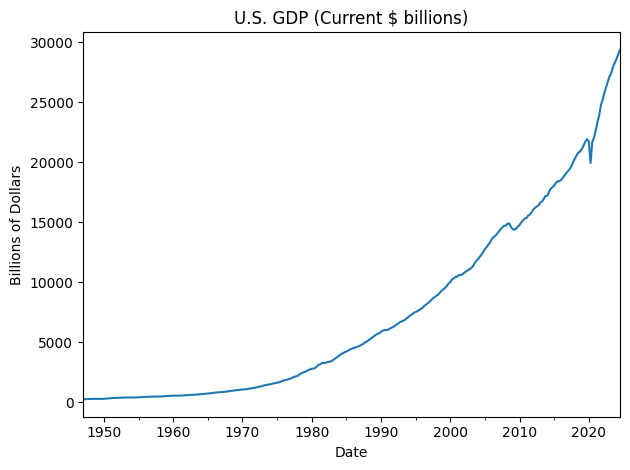

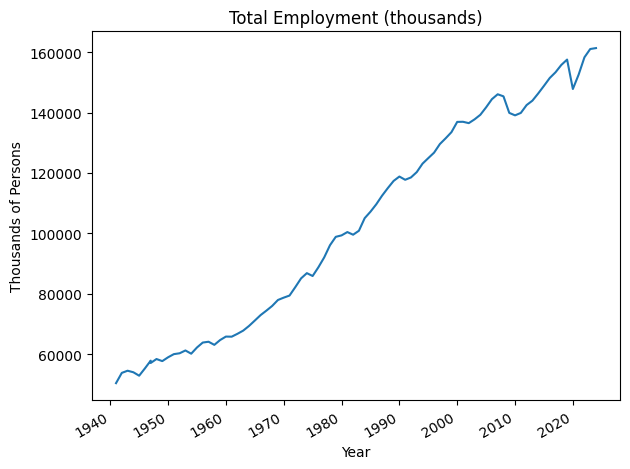

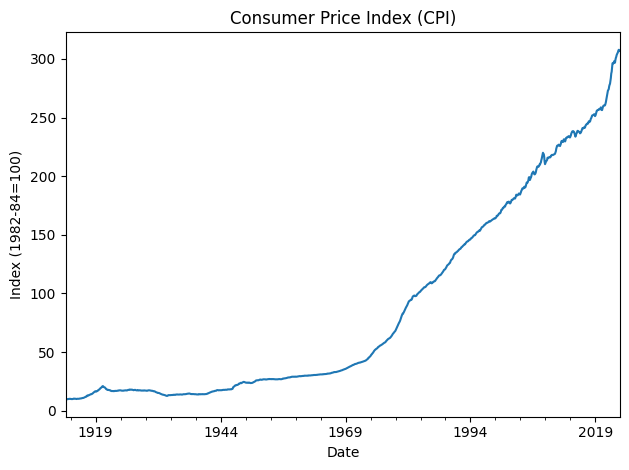

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- 1. 住宅價格指數（House Price Index, HPI）----
hpi = pd.read_csv('economic data/House Price.csv', parse_dates=['Date'])
# 取全美國家級指數 (National‑US)
hpi_series = hpi.set_index('Date')['National-US']

plt.figure()
hpi_series.plot()
plt.title('U.S. National House Price Index')
plt.xlabel('Date')
plt.ylabel('Index (1987=100)')
plt.tight_layout()
plt.show()

# ---- 2. 國內生產毛額（GDP, Current Dollars, 季）----
gdp = pd.read_csv('economic data/GDP.csv', parse_dates=['date'])
gdp_series = gdp.set_index('date')['level-current']

plt.figure()
gdp_series.plot()
plt.title('U.S. GDP (Current $ billions)')
plt.xlabel('Date')
plt.ylabel('Billions of Dollars')
plt.tight_layout()
plt.show()

# ---- 3. 就業人數（Employment, 年）----
emp = pd.read_csv('economic data/Employmeny.csv')
emp['Date'] = pd.to_datetime(emp['year'].astype(str))
emp_series = emp.set_index('Date')['employed_total']

plt.figure()
emp_series.plot()
plt.title('Total Employment (thousands)')
plt.xlabel('Year')
plt.ylabel('Thousands of Persons')
plt.tight_layout()
plt.show()

# ---- 4. 消費者物價指數（CPI，月）----
cpi = pd.read_csv('economic data/CPI.csv', parse_dates=['Date'])
cpi_series = cpi.set_index('Date')['Index']

plt.figure()
cpi_series.plot()
plt.title('Consumer Price Index (CPI)')
plt.xlabel('Date')
plt.ylabel('Index (1982-84=100)')
plt.tight_layout()
plt.show()


In [19]:
# ----- 讀 CSV -----
hpi = pd.read_csv('economic data/House Price.csv', parse_dates=['Date'])
gdp = pd.read_csv('economic data/GDP.csv',              parse_dates=['date'])
emp = pd.read_csv('economic data/Employmeny.csv')  # 只有年份欄
cpi = pd.read_csv('economic data/CPI.csv',               parse_dates=['Date'])

# ----- 建立 Series 並去重 -----
hpi_s = hpi.set_index('Date')['National-US'].sort_index().loc[~hpi.set_index('Date').index.duplicated()]
gdp_s = gdp.set_index('date')['level-current'].sort_index().loc[~gdp.set_index('date').index.duplicated()]

emp['Date'] = pd.to_datetime(emp['year'], format='%Y')   # << 這行是關鍵修正
emp_s = emp.set_index('Date')['employed_total'].sort_index()

cpi_s = cpi.set_index('Date')['Index'].sort_index().loc[~cpi.set_index('Date').index.duplicated()]


In [20]:
hpi_a = hpi_s.resample('A').mean()
gdp_a = gdp_s.resample('A').mean()
emp_a = emp_s.resample('A').mean()
cpi_a = cpi_s.resample('A').mean()


/var/folders/ry/731bf1qx5jvgd8srbjt1ns8h0000gn/T/ipykernel_2894/1223714926.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  hpi_a = hpi_s.resample('A').mean()
/var/folders/ry/731bf1qx5jvgd8srbjt1ns8h0000gn/T/ipykernel_2894/1223714926.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  gdp_a = gdp_s.resample('A').mean()
/var/folders/ry/731bf1qx5jvgd8srbjt1ns8h0000gn/T/ipykernel_2894/1223714926.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  emp_a = emp_s.resample('A').mean()
/var/folders/ry/731bf1qx5jvgd8srbjt1ns8h0000gn/T/ipykernel_2894/1223714926.py:4: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  cpi_a = cpi_s.resample('A').mean()


In [21]:
df = pd.concat([hpi_a, gdp_a, emp_a, cpi_a], axis=1)
df.columns = ['HPI', 'GDP', 'Employment', 'CPI']
df = df.dropna()                 # << 去掉沒有四筆齊全的年份
# 現在共同完整區段是 1987–2011，若想擴大或縮小可改這行


In [22]:
df_norm = df / df.iloc[0] * 100  # 首列 (=1987 年) 當作 100


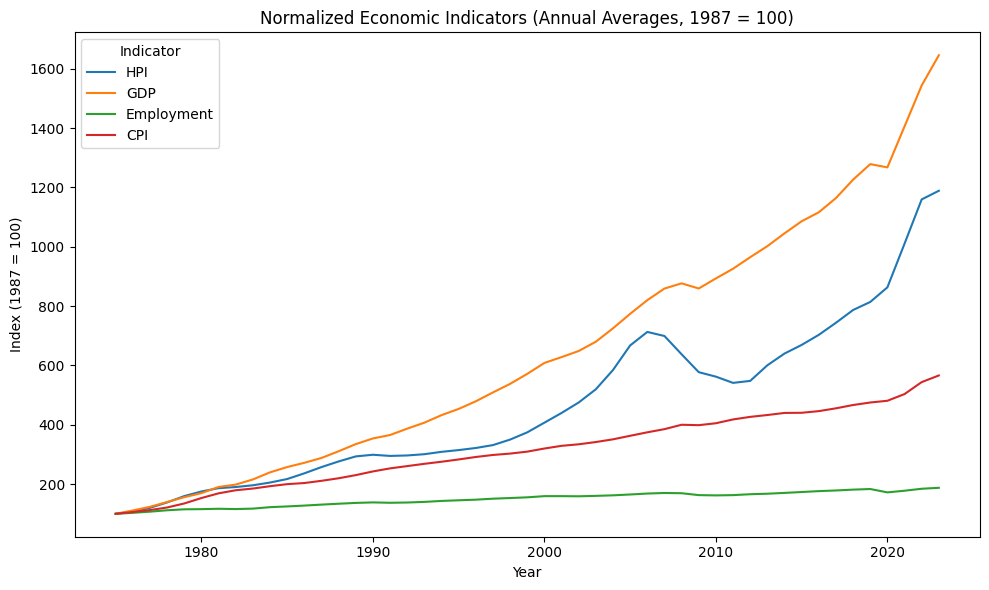

In [23]:
plt.figure(figsize=(10, 6))
for col in df_norm.columns:
    plt.plot(df_norm.index.year, df_norm[col], label=col)

plt.title('Normalized Economic Indicators (Annual Averages, 1987 = 100)')
plt.xlabel('Year')
plt.ylabel('Index (1987 = 100)')
plt.legend(title='Indicator')
plt.tight_layout()
plt.show()
